## 1. Import các thư viện cần thiết

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Đọc dữ liệu từ file CSV (thay bằng đường dẫn thực tế)

## 2. Đọc dữ liệu từ file CSV

In [54]:
# Đọc dữ liệu từ file CSV (thay bằng đường dẫn thực tế)
df = pd.read_csv("food_consumption_complete.csv", sep=',')

In [55]:
df.head()

,h_code,tinh,year,household_size,head_gender,head_age,area_type1,area_type2,outpatient_visits,outpatient_cost,...,insurance_outpatient,insurance_inpatient,medicine_cost,equipment_cost,health_subsidy,thubq,thunhap,total_income,other_income,total_food_con
0,10010000400815,1,2012,5,1,33,NaN,1,2.0,500.0,...,2.0,2.0,500,0,0.0,5717,343000.0,207000.0,NaN,21890.0
1,10010000400815,1,2012,5,1,33,NaN,1,2.0,500.0,...,2.0,2.0,500,0,0.0,5717,343000.0,NaN,136000.0,21890.0
2,10010000400815,1,2014,5,1,35,1.0,1,3.0,1310.0,...,2.0,2.0,980,150,0.0,9876,592600.0,297600.0,295000.0,27163.0
3,10010000400815,1,2016,5,1,37,1.0,1,NaN,NaN,...,2.0,2.0,670,200,0.0,10710,642600.0,415600.0,155000.0,24578.0
4,10010002802514,1,2012,5,2,60,NaN,1,1.0,120.0,...,1.0,2.0,500,0,125.0,2709,162525.0,150400.0,NaN,12198.0


## 3. Kiểm tra thông tin cơ bản của dữ liệu 

In [56]:
df.info() # Hiển thị thông tin cơ bản về dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6540 entries, 0 to 6539
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   h_code                6540 non-null   int64  
 1   tinh                  6540 non-null   int64  
 2   year                  6540 non-null   int64  
 3   household_size        6540 non-null   int64  
 4   head_gender           6540 non-null   int64  
 5   head_age              6540 non-null   int64  
 6   area_type1            3276 non-null   float64
 7   area_type2            6540 non-null   int64  
 8   outpatient_visits     4896 non-null   float64
 9   outpatient_cost       4483 non-null   float64
 10  inpatient_visits      4896 non-null   float64
 11  inpatient_cost        1596 non-null   float64
 12  insurance_premium     3347 non-null   float64
 13  insurance_outpatient  5949 non-null   float64
 14  insurance_inpatient   5949 non-null   float64
 15  medicine_cost        

## 4. Kiểm tra giá trị thiếu

In [57]:
# Kiểm tra giá trị thiếu
df.isnull().sum()

h_code                     0
tinh                       0
year                       0
household_size             0
head_gender                0
head_age                   0
area_type1              3264
area_type2                 0
outpatient_visits       1644
outpatient_cost         2057
inpatient_visits        1644
inpatient_cost          4944
insurance_premium       3193
insurance_outpatient     591
insurance_inpatient      591
medicine_cost              0
equipment_cost             0
health_subsidy             0
thubq                      0
thunhap                    0
total_income            1635
other_income            1635
total_food_con             0
dtype: int64

# Xử lý dữ liệu thiếu

In [58]:
# Fill giá trị thiếu cho biến liên tục bằng mean
numerical_cols = ['outpatient_visits', 'outpatient_cost', 'inpatient_visits', 'inpatient_cost', 
                  'insurance_premium', 'total_income', 'other_income', 'area_type1']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill giá trị thiếu cho biến định tính bằng mode
categorical_cols = ['insurance_outpatient', 'insurance_inpatient']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [59]:
# kiểm tra lại giá trị thiếu
df.isnull().sum()

h_code                  0
tinh                    0
year                    0
household_size          0
head_gender             0
head_age                0
area_type1              0
area_type2              0
outpatient_visits       0
outpatient_cost         0
inpatient_visits        0
inpatient_cost          0
insurance_premium       0
insurance_outpatient    0
insurance_inpatient     0
medicine_cost           0
equipment_cost          0
health_subsidy          0
thubq                   0
thunhap                 0
total_income            0
other_income            0
total_food_con          0
dtype: int64

## 5. Tóm tắt thống kê của dữ liệu 


In [60]:
summary = df.describe(include='all')
summary

,h_code,tinh,year,household_size,head_gender,head_age,area_type1,area_type2,outpatient_visits,outpatient_cost,...,insurance_outpatient,insurance_inpatient,medicine_cost,equipment_cost,health_subsidy,thubq,thunhap,total_income,other_income,total_food_con
count,6.540000e+03,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,...,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6540.000000,6.540000e+03,6540.00000,6.540000e+03,6540.000000
mean,4.776141e+14,47.285015,2013.500000,3.820642,1.230581,50.923394,45.616606,1.011621,2.618464,997.274370,...,1.708563,1.910092,716.845107,53.343731,856.698318,2405.687768,1.047135e+05,47871.03160,1.214546e+04,4432.786269
std,2.775133e+14,27.481993,1.658439,1.532869,0.421237,14.020317,18.998042,0.125577,3.295399,3411.840451,...,0.454459,0.286072,1766.198219,207.932229,5548.468689,2682.889521,1.112111e+05,59012.16592,3.931965e+04,3869.959772
min,1.001000e+13,1.000000,2012.000000,1.000000,1.000000,16.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,115.000000,2.765000e+03,0.00000,-1.140000e+03,260.000000
25%,2.523708e+14,25.000000,2012.000000,3.000000,1.000000,41.000000,40.000000,1.000000,1.000000,100.000000,...,1.000000,2.000000,150.000000,0.000000,0.000000,1058.750000,4.426700e+04,1000.00000,1.050000e+03,2315.000000
50%,4.445519e+14,44.000000,2013.000000,4.000000,1.000000,49.000000,45.616606,1.000000,2.000000,600.000000,...,2.000000,2.000000,300.000000,0.000000,0.000000,1833.000000,7.912700e+04,47871.03160,6.000000e+03,3517.000000
75%,7.271026e+14,72.000000,2014.500000,5.000000,1.000000,59.000000,45.616606,1.000000,2.618464,997.274370,...,2.000000,2.000000,600.000000,50.000000,200.000000,2940.250000,1.326702e+05,50400.00000,1.214546e+04,5438.250000
max,9.697332e+14,96.000000,2016.000000,13.000000,2.000000,99.000000,99.000000,3.000000,60.000000,125000.000000,...,2.000000,2.000000,38000.000000,8690.000000,200000.000000,68058.000000,2.646980e+06,654000.00000,1.905000e+06,92958.000000


## 6.Sử dụng Random Forget để giữ các biến quan trọng 

In [61]:
# Mã hóa biến định tính bằng LabelEncoder
le = LabelEncoder()
for col in ['tinh', 'head_gender', 'area_type2', 'insurance_outpatient', 'insurance_inpatient']:
    df[col] = le.fit_transform(df[col])

# Kiểm tra phân phối biến mục tiêu
print("\nPhân phối biến mục tiêu total_food_con:")
print(df['total_food_con'].describe())


Phân phối biến mục tiêu total_food_con:
count     6540.000000
mean      4432.786269
std       3869.959772
min        260.000000
25%       2315.000000
50%       3517.000000
75%       5438.250000
max      92958.000000
Name: total_food_con, dtype: float64



Tầm quan trọng của các đặc trưng:
                Variable  Importance
18               thunhap    0.396050
19          total_income    0.097418
17                 thubq    0.067696
11     insurance_premium    0.067632
20          other_income    0.052311
2         household_size    0.048350
14         medicine_cost    0.045268
4               head_age    0.042796
0                   tinh    0.041013
5             area_type1    0.032238
8        outpatient_cost    0.030254
7      outpatient_visits    0.018122
15        equipment_cost    0.016907
10        inpatient_cost    0.012741
16        health_subsidy    0.009199
9       inpatient_visits    0.006507
1                   year    0.005970
12  insurance_outpatient    0.004153
3            head_gender    0.003650
6             area_type2    0.000868
13   insurance_inpatient    0.000856


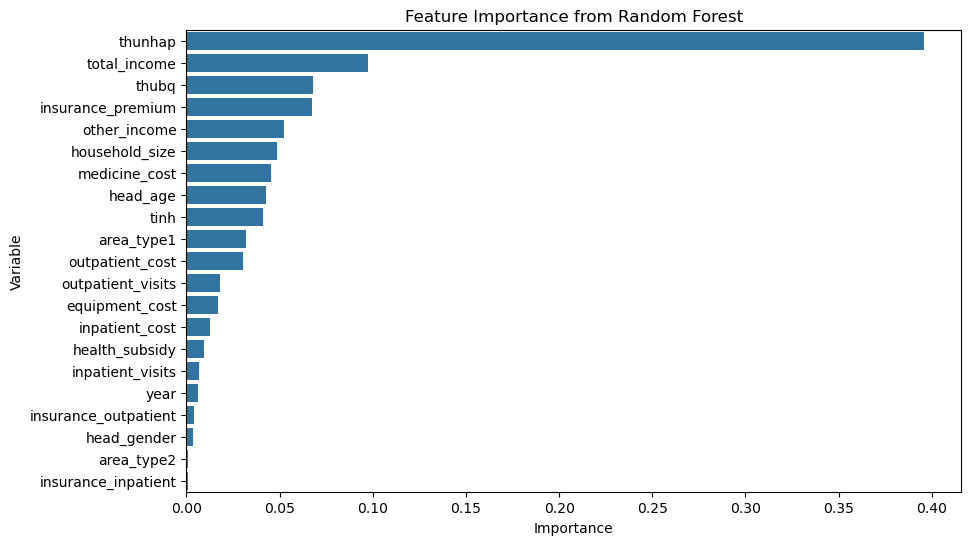


Các biến quan trọng được giữ lại: ['thunhap', 'total_income', 'thubq', 'insurance_premium', 'other_income']


,thunhap,total_income,thubq,insurance_premium,other_income,total_food_con
0,343000.0,207000.0000,5717,383.208844,12145.462997,21890.0
1,343000.0,47871.0316,5717,383.208844,136000.000000,21890.0
2,592600.0,297600.0000,9876,290.000000,295000.000000,27163.0
3,642600.0,415600.0000,10710,457.000000,155000.000000,24578.0
4,162525.0,150400.0000,2709,209.000000,12145.462997,12198.0


In [62]:
# Sử dụng Random Forest để đánh giá tầm quan trọng của các đặc trưng
X = df.drop(['total_food_con', 'h_code'], axis=1)  # Loại bỏ biến mục tiêu và h_code
y = df['total_food_con']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Tầm quan trọng của các đặc trưng
feature_importance = pd.DataFrame({'Variable': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nTầm quan trọng của các đặc trưng:")
print(feature_importance)

# Vẽ biểu đồ tầm quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.show()

# Chọn các biến quan trọng (giữ lại các biến có tầm quan trọng > 0.05)
important_features = feature_importance[feature_importance['Importance'] > 0.05]['Variable'].tolist()
print("\nCác biến quan trọng được giữ lại:", important_features)

# Tạo DataFrame mới chỉ chứa các biến quan trọng và total_food_con
df = df[important_features + ['total_food_con']]
df.head()


## 7. Tách biến liên tục và rời rạc 

In [63]:
#  Tách features (X) và target (y)
continuous_vars = []
discrete_vars = []

for col in df.columns:
    if col != 'total_food_con':
        if df[col].dtype in ['int64', 'float64'] and df[col].nunique() > 15:
            continuous_vars.append(col)
        else:
            discrete_vars.append(col)

print("\nBiến liên tục:", continuous_vars)
print("Biến rời rạc:", discrete_vars)


Biến liên tục: ['thunhap', 'total_income', 'thubq', 'insurance_premium', 'other_income']
Biến rời rạc: []


## Chuyển đổi biến target thành nhị phân

In [64]:
# Biến đổi total_food_con thành binary (0/1)
threshold = df['total_food_con'].median()  # Sử dụng median làm ngưỡng
df['food_con_binary'] = np.where(df['total_food_con'] > threshold, 1, 0)

# Kiểm tra phân phối biến nhị phân mới
print("\nPhân phối biến nhị phân mới:")
print(df['food_con_binary'].value_counts(normalize=True))



Phân phối biến nhị phân mới:
food_con_binary
0    0.500306
1    0.499694
Name: proportion, dtype: float64


Ý nghĩa của food_con_binary:

1: Đại diện cho các hộ gia đình có mức tiêu thụ thực phẩm (total_food_con) cao hơn giá trị trung vị của toàn bộ tập dữ liệu. Nghĩa là, đây là nhóm có tiêu thụ thực phẩm cao hơn mức trung bình của tập dữ liệu.

0: Đại diện cho các hộ gia đình có mức tiêu thụ thực phẩm (total_food_con) bằng hoặc thấp hơn giá trị trung vị. Đây là nhóm có tiêu thụ thực phẩm thấp hơn hoặc bằng mức trung bình

## 8. Phân tích biến liên tục - Ma trận tương quan và Boxplot

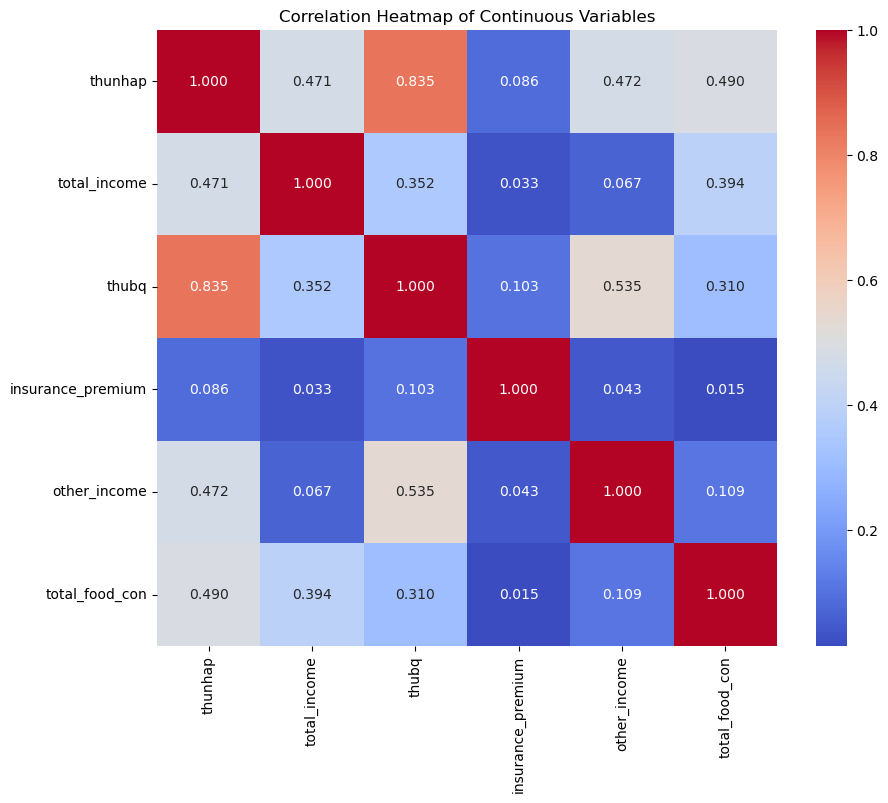

In [65]:
# Phân tích biến liên tục: Heatmap tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(df[continuous_vars + ['total_food_con']].corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

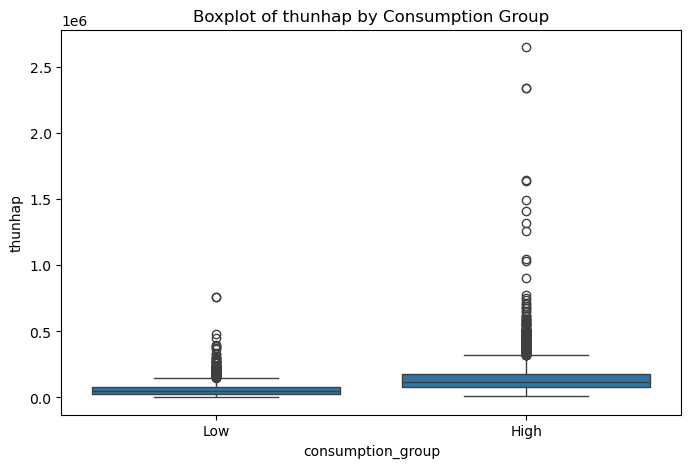

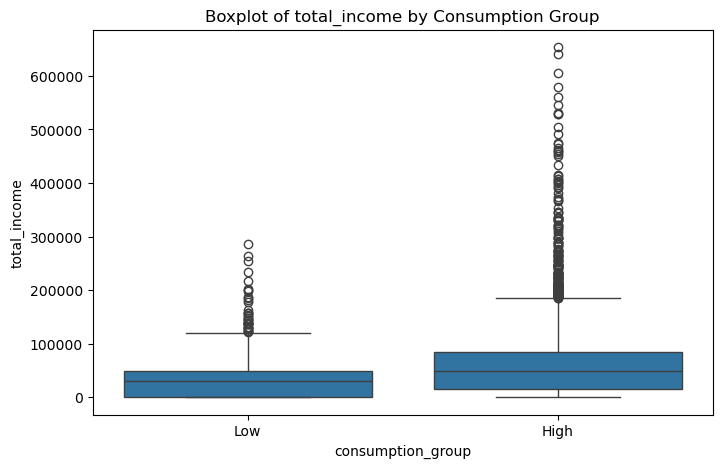

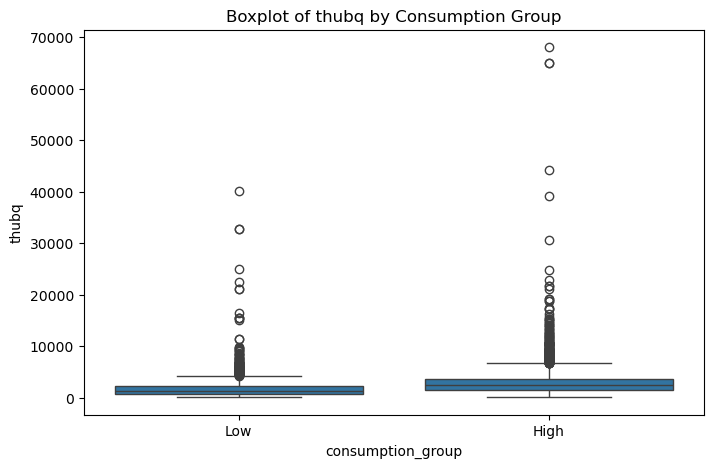

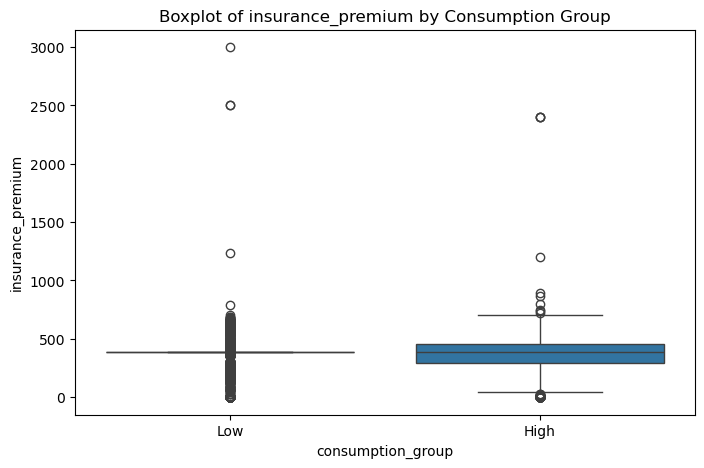

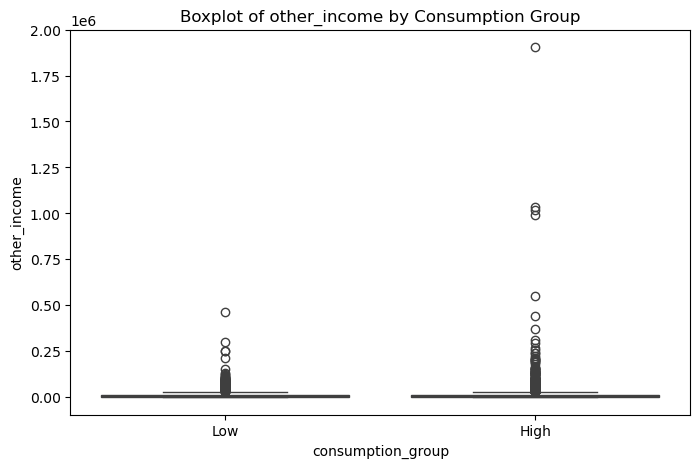

In [66]:

# Boxplot cho biến liên tục theo nhóm high/low consumption
df['consumption_group'] = pd.qcut(df['total_food_con'], 2, labels=['Low', 'High'])
for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='consumption_group', y=var, data=df)
    plt.title(f'Boxplot of {var} by Consumption Group')
    plt.show()

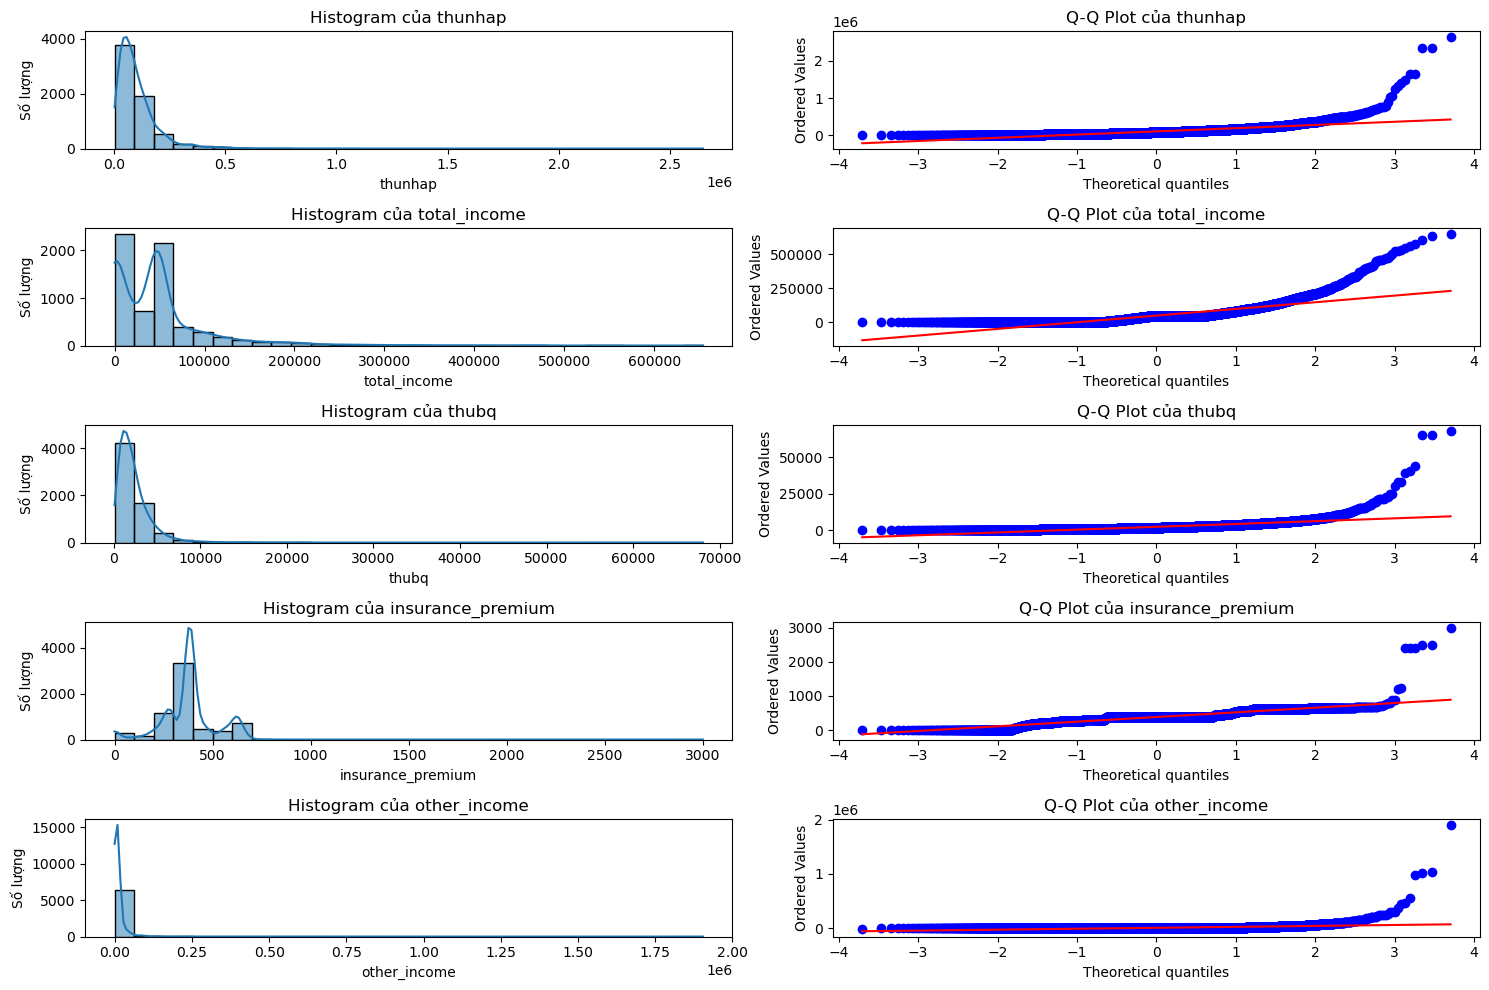


Kiểm định Shapiro-Wilk cho thunhap:
Statistic: 0.5994, p-value: 8.8143e-82
thunhap KHÔNG tuân theo phân phối chuẩn (p-value < 0.05).

Kiểm định Shapiro-Wilk cho total_income:
Statistic: 0.6978, p-value: 1.0725e-75
total_income KHÔNG tuân theo phân phối chuẩn (p-value < 0.05).

Kiểm định Shapiro-Wilk cho thubq:
Statistic: 0.5176, p-value: 6.2687e-86
thubq KHÔNG tuân theo phân phối chuẩn (p-value < 0.05).

Kiểm định Shapiro-Wilk cho insurance_premium:
Statistic: 0.7927, p-value: 6.2153e-68
insurance_premium KHÔNG tuân theo phân phối chuẩn (p-value < 0.05).

Kiểm định Shapiro-Wilk cho other_income:
Statistic: 0.1921, p-value: 5.5990e-98
other_income KHÔNG tuân theo phân phối chuẩn (p-value < 0.05).


In [67]:

from scipy.stats import shapiro, probplot

# Danh sách các biến liên tục
continuous_vars = ['thunhap', 'total_income', 'thubq', 'insurance_premium', 'other_income']

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(15, 10))

# Kiểm tra phân phối chuẩn cho từng biến
for i, var in enumerate(continuous_vars, 1):
    # 1. Histogram
    plt.subplot(len(continuous_vars), 2, 2*i-1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Histogram của {var}')
    plt.xlabel(var)
    plt.ylabel('Số lượng')

    # 2. Q-Q Plot
    plt.subplot(len(continuous_vars), 2, 2*i)
    probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot của {var}')

plt.tight_layout()
plt.show()

# 3. Kiểm định Shapiro-Wilk
for var in continuous_vars:
    stat, p_value = shapiro(df[var])
    print(f'\nKiểm định Shapiro-Wilk cho {var}:')
    print(f'Statistic: {stat:.4f}, p-value: {p_value:.4e}')
    if p_value < 0.05:
        print(f'{var} KHÔNG tuân theo phân phối chuẩn (p-value < 0.05).')
    else:
        print(f'{var} có thể tuân theo phân phối chuẩn (p-value >= 0.05).')

## Vì không tuần theo phân phối chuẩn nên kiểm tra tương quan dùng Spearman Correlation

In [68]:
from scipy import stats
# Kiểm tra tương quan giữa các biến quan trọng với food_con_binary
print("\nKiểm tra hướng quan hệ giữa các biến quan trọng và food_con_binary:\n")

# Spearman Correlation cho các biến liên tục
print("\nKết quả Spearman Correlation (biến liên tục):")
spearman_correlations = []
for var in continuous_vars:
    corr, p_value = stats.spearmanr(df[var], df['food_con_binary'])
    spearman_correlations.append({
        'Variable': var,
        'Correlation': corr,
        'P-value': p_value
    })
spearman_corr_df = pd.DataFrame(spearman_correlations)
print(spearman_corr_df)


Kiểm tra hướng quan hệ giữa các biến quan trọng và food_con_binary:


Kết quả Spearman Correlation (biến liên tục):
            Variable  Correlation        P-value
0            thunhap     0.594652   0.000000e+00
1       total_income     0.270115  1.007539e-109
2              thubq     0.387672  1.555245e-233
3  insurance_premium    -0.010483   3.966417e-01
4       other_income     0.018158   1.420343e-01


## 9. Phân tích bằng GLM

In [69]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sử dụng các biến liên tục đã xác định từ feature_importance
continuous_vars = important_features  # ['thunhap', 'total_income', 'thubq', 'insurance_premium', 'other_income']
print("\nKiểm tra giả định cho GLM (binomial):")

# Phân phối biến phụ thuộc
print(" - Phân phối của food_con_binary:")
print(df['food_con_binary'].value_counts(normalize=True))

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X = df[continuous_vars]
y = df['food_con_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tính VIF cho các biến quan trọng
X = df[continuous_vars]
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]       
print("\nVariance Inflation Factor (VIF) cho các biến liên tục:")
print(vif_data)


Kiểm tra giả định cho GLM (binomial):
 - Phân phối của food_con_binary:
food_con_binary
0    0.500306
1    0.499694
Name: proportion, dtype: float64

Variance Inflation Factor (VIF) cho các biến liên tục:
            Variable       VIF
0            thunhap  7.140613
1       total_income  2.173495
2              thubq  6.526634
3  insurance_premium  1.959314
4       other_income  1.591345


In [70]:
 # Chạy GLM với các biến đã chọn
print("\nChạy GLM (binomial, logit link):")
X_train_glm = X_train[continuous_vars]
X_train_const = sm.add_constant(X_train_glm)

glm_model = sm.GLM(y_train, X_train_const, family=sm.families.Binomial()).fit()
print("\nTóm tắt mô hình GLM:")
print(glm_model.summary())


Chạy GLM (binomial, logit link):

Tóm tắt mô hình GLM:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        food_con_binary   No. Observations:                 5232
Model:                            GLM   Df Residuals:                     5226
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2532.9
Date:                Mon, 29 Sep 2025   Deviance:                       5065.8
Time:                        17:41:36   Pearson chi2:                 1.90e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3416
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

In [71]:
# Dự đoán và đánh giá trên tập kiểm tra
X_test_sm = sm.add_constant(X_test)
y_pred_prob = model.predict(X_test_sm)
y_pred = (y_pred_prob > 0.5).astype(int)
print("\nĐánh giá mô hình trên tập kiểm tra:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred))

# Phân tích chi tiết kết quả
results_df = pd.DataFrame({
    'Variable': model.params.index,
    'Coefficient': model.params.values,
    'P-value': model.pvalues.values
})
print("\nPhân tích chi tiết kết quả Logistic Regression:")
results_df


Đánh giá mô hình trên tập kiểm tra:
Accuracy: 0.774
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       634
           1       0.83      0.71      0.77       674

    accuracy                           0.77      1308
   macro avg       0.78      0.78      0.77      1308
weighted avg       0.78      0.77      0.77      1308


Phân tích chi tiết kết quả Logistic Regression:


,Variable,Coefficient,P-value
0,const,-1.934499e+00,3.733485e-73
1,thunhap,3.872991e-05,5.380898e-173
2,total_income,2.597475e-07,8.155401e-01
3,thubq,-6.455441e-04,4.323923e-50
4,insurance_premium,-2.857195e-04,1.933008e-01
5,other_income,-5.547885e-06,2.000438e-02



Kiểm tra tính tuyến tính của log-odds với các biến liên tục:


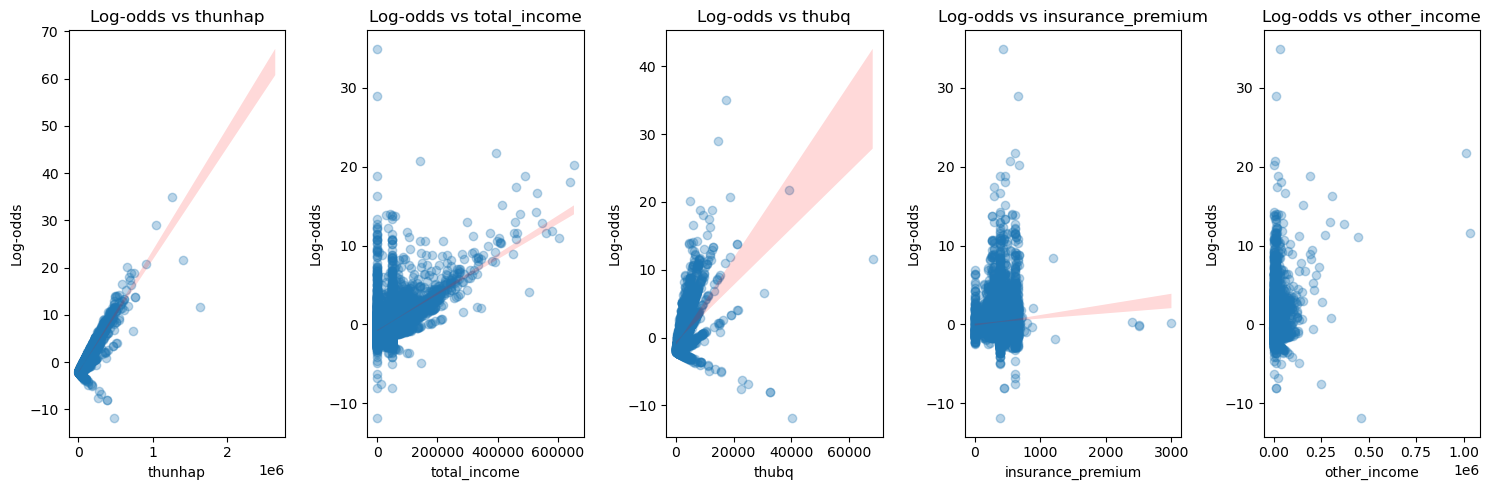

In [72]:
# Kiểm tra tính tuyến tính giữa log-odds và các biến liên tục
print("\nKiểm tra tính tuyến tính của log-odds với các biến liên tục:")
y_pred_prob = model.predict(X_train_sm)
log_odds = np.log(y_pred_prob / (1 - y_pred_prob))

if len(continuous_vars) > 0:
    plt.figure(figsize=(15, 5))
    for i, var in enumerate(continuous_vars):
        plt.subplot(1, len(continuous_vars), i+1)
        plt.scatter(X_train[var], log_odds, alpha=0.3)
        sns.regplot(x=X_train[var], y=log_odds, scatter=False, color='red')
        plt.title(f'Log-odds vs {var}')
        plt.xlabel(var)
        plt.ylabel('Log-odds')
    plt.tight_layout()
    plt.show()

In [73]:
# Phân tích hiệu ứng của các biến
print("\nPhân tích hiệu ứng của các biến:")
for index, row in results_df.iterrows():
    var = row['Variable']
    coef = row['Coefficient']
    p_val = row['P-value']
    if var != 'const' and p_val < 0.05:
        if coef > 0:
            print(f"- Biến {var}: Hệ số = {coef:.6f}, p-value = {p_val:.2e}. Ảnh hưởng thuận: Khi {var} tăng 1 đơn vị, log-odds của food_con_binary tăng {coef:.6f}.")
        else:
            print(f"- Biến {var}: Hệ số = {coef:.6f}, p-value = {p_val:.2e}. Ảnh hưởng nghịch: Khi {var} tăng 1 đơn vị, log-odds của food_con_binary giảm {-coef:.6f}.")

# Kết luận
print("\nKết luận:")
print("- Yếu tố quan trọng nhất từ Random Forest:", ", ".join(feature_importance['Variable'][:5].tolist()))
print("- Mô hình Logistic Regression cho biến nhị phân có accuracy tùy theo dữ liệu.")
print("- Đề xuất: Sử dụng mô hình phân loại khác như Random Forest Classifier để cải thiện nếu cần.")


Phân tích hiệu ứng của các biến:
- Biến thunhap: Hệ số = 0.000039, p-value = 5.38e-173. Ảnh hưởng thuận: Khi thunhap tăng 1 đơn vị, log-odds của food_con_binary tăng 0.000039.
- Biến thubq: Hệ số = -0.000646, p-value = 4.32e-50. Ảnh hưởng nghịch: Khi thubq tăng 1 đơn vị, log-odds của food_con_binary giảm 0.000646.
- Biến other_income: Hệ số = -0.000006, p-value = 2.00e-02. Ảnh hưởng nghịch: Khi other_income tăng 1 đơn vị, log-odds của food_con_binary giảm 0.000006.

Kết luận:
- Yếu tố quan trọng nhất từ Random Forest: thunhap, total_income, thubq, insurance_premium, other_income
- Mô hình Logistic Regression cho biến nhị phân có accuracy tùy theo dữ liệu.
- Đề xuất: Sử dụng mô hình phân loại khác như Random Forest Classifier để cải thiện nếu cần.
